In [2]:
import numpy as np
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
%matplotlib.inline

warnings.simplefilter("ignore")

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plot_per_col_dist(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    n_rows, n_cols = df.shape
    col_names = list(df)
    n_graph_row = (n_cols + n_graph_per_row - 1) / n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 8 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    
    for i in range(min(n_cols, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        col_df = df.iloc[:, i]
       
        if (not np.issubdtype(type(col_df.iloc[0]), np.number)):
            valueCounts = col_df.value_counts()
            valueCounts.plot.bar()
        else:
            col_df.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{col_names[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plot_corr_mat(df, g_width):
    file_name = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    
    plt.figure(num=None, figsize=(g_width, g_width), dpi=80, facecolor='w', edgecolor='k')
    correlation_mat = plt.matshow(corr, fignum = 1)   
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(correlation_mat)
    plt.title(f'Correlation Matrix for {file_name}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plot_scatter_mat(df, plot_size, text_size):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ''' removing nulll values '''
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    col_names = list(df)
    
    if len(col_names) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        col_names = col_names[:10]
    df = df[col_names]
    
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plot_size, plot_size], diagonal='kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=text_size)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
''' reading 1st file i.e Train.csv '''
n_rows = 100
train_df = pd.read_csv('Train.csv', nrows=n_rows)
train_df.dataframeName = 'Train.csv'

In [7]:
''' displaying fist five rors '''
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
''' shape of dataset '''
train_df.shape

(100, 12)

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_2712\1555582881.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


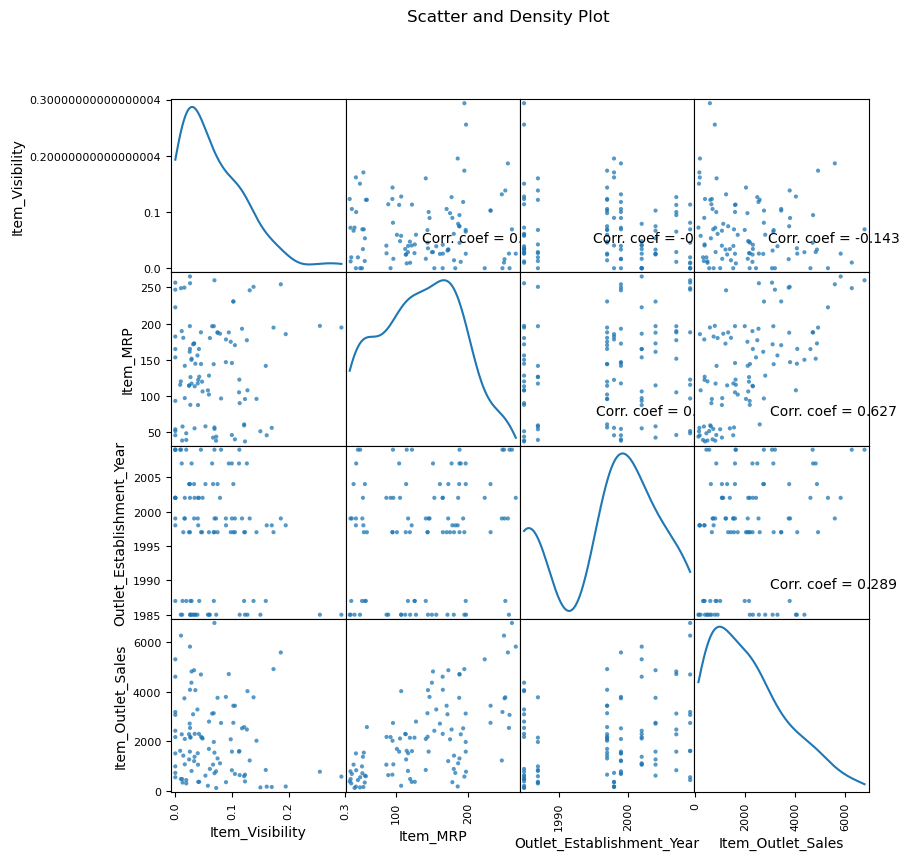

In [9]:
''' scatter plot'''
plot_scatter_mat(train_df, 9, 10)

In [10]:
''' dist plot '''
plot_per_col_dist(train_df, 10, 5)

ValueError: Number of rows must be a positive integer, not 2.2

<Figure size 2400x1408 with 0 Axes>

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_2712\2666540775.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_2712\2666540775.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


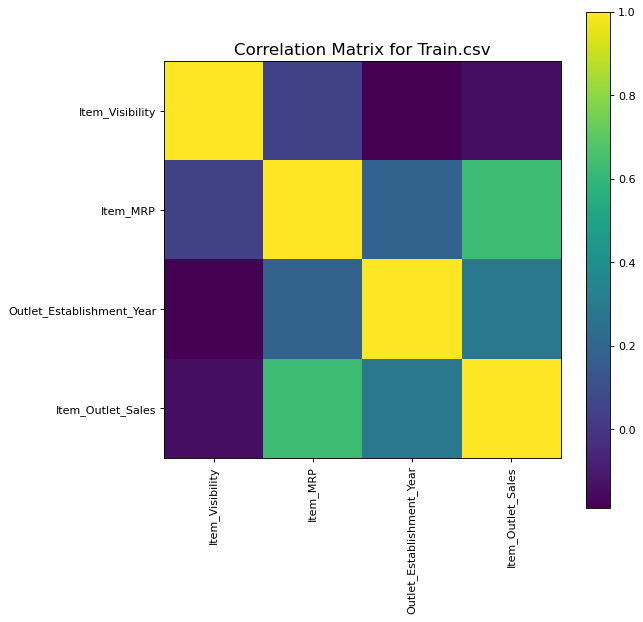

In [11]:
''' correlation plot '''
plot_corr_mat(train_df, 8)

In [12]:
''' reading 2nd file i.e Test.csv '''
n_rows = 100
test_df = pd.read_csv('Test.csv', nrows=n_rows)
test_df.dataframeName = 'Test.csv'

In [13]:
''' displaying 1st 5 rows '''
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [14]:
''' shape of datawset '''
test_df.shape

(100, 11)

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_2712\1555582881.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


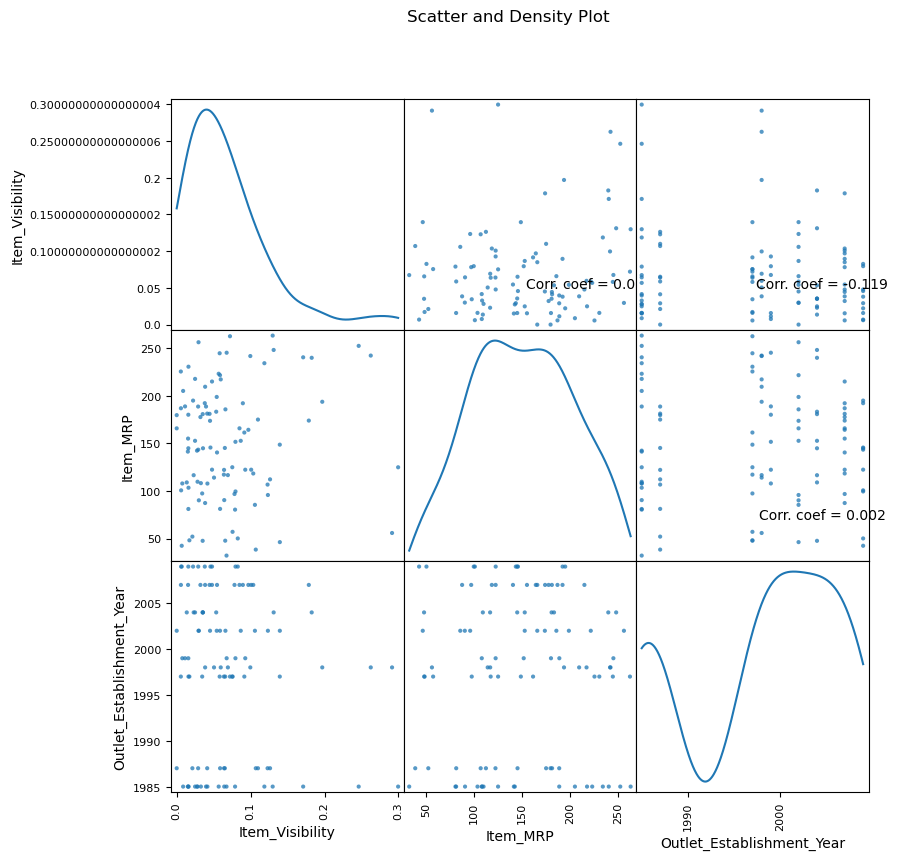

In [15]:
''' scatter plot'''
plot_scatter_mat(test_df, 9, 10)

In [16]:
''' dist plot '''
plot_per_col_dist(test_df, 10, 5)

ValueError: Number of rows must be a positive integer, not 2.2

<Figure size 2400x1408 with 0 Axes>

C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_2712\2666540775.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\MOHAMMED RIZWAN\AppData\Local\Temp\ipykernel_2712\2666540775.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


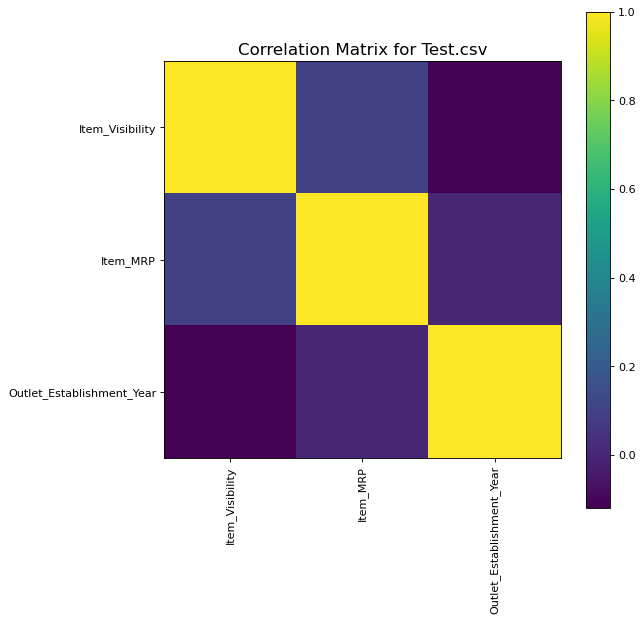

In [17]:
''' correlation plot '''
plot_corr_mat(test_df, 8)